<a href="https://colab.research.google.com/github/YasmineCodes/StudentDebt/blob/master/ml_models/MachineLearningModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

In [128]:
df=pd.read_csv('/content/drive/MyDrive/StudentDebt/simplified_scorecard.csv')

In [129]:
df.shape

(124699, 8)

In [116]:
df.head()

,Unnamed: 0,CITY,ADM_RATE,INSTNM,median_hh_inc,poverty_rate,DEP_DEBT_MDN,IND_DEBT_MDN
0,0,MONTGOMERY,NaN,COMMUNITY COLLEGE OF THE AIR FORCE,NaN,NaN,NaN,NaN
1,1,NORMAL,NaN,ALABAMA A & M UNIVERSITY,NaN,NaN,NaN,NaN
2,2,BIRMINGHAM,NaN,UNIVERSITY OF ALABAMA AT BIRMINGHAM,NaN,NaN,NaN,NaN
3,3,OZARK,NaN,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN,NaN,NaN,NaN
4,4,MONTGOMERY,NaN,SOUTHERN CHRISTIAN UNIVERSITY,NaN,NaN,NaN,NaN


In [130]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [118]:
df.describe()

,ADM_RATE,median_hh_inc,poverty_rate,DEP_DEBT_MDN,IND_DEBT_MDN
count,34156.000000,31384.000000,31384.000000,69510.000000,77396.000000
mean,0.696963,56908.946902,11.156665,7680.124968,9448.254115
std,0.223910,12707.984055,6.847895,4682.888942,5109.133693
min,0.000000,14277.000000,0.700000,643.000000,310.000000
25%,0.555600,48773.910000,7.240000,3781.125000,5699.750000
50%,0.721100,56463.820000,9.300000,6158.750000,8485.000000
75%,0.861525,64806.335000,12.850000,10756.375000,12500.000000
max,10.000000,125713.000000,58.900002,34375.000000,48000.000000


In [131]:
df.duplicated().sum()

18150

In [132]:
df.shape

(124699, 7)

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.shape

(106549, 7)

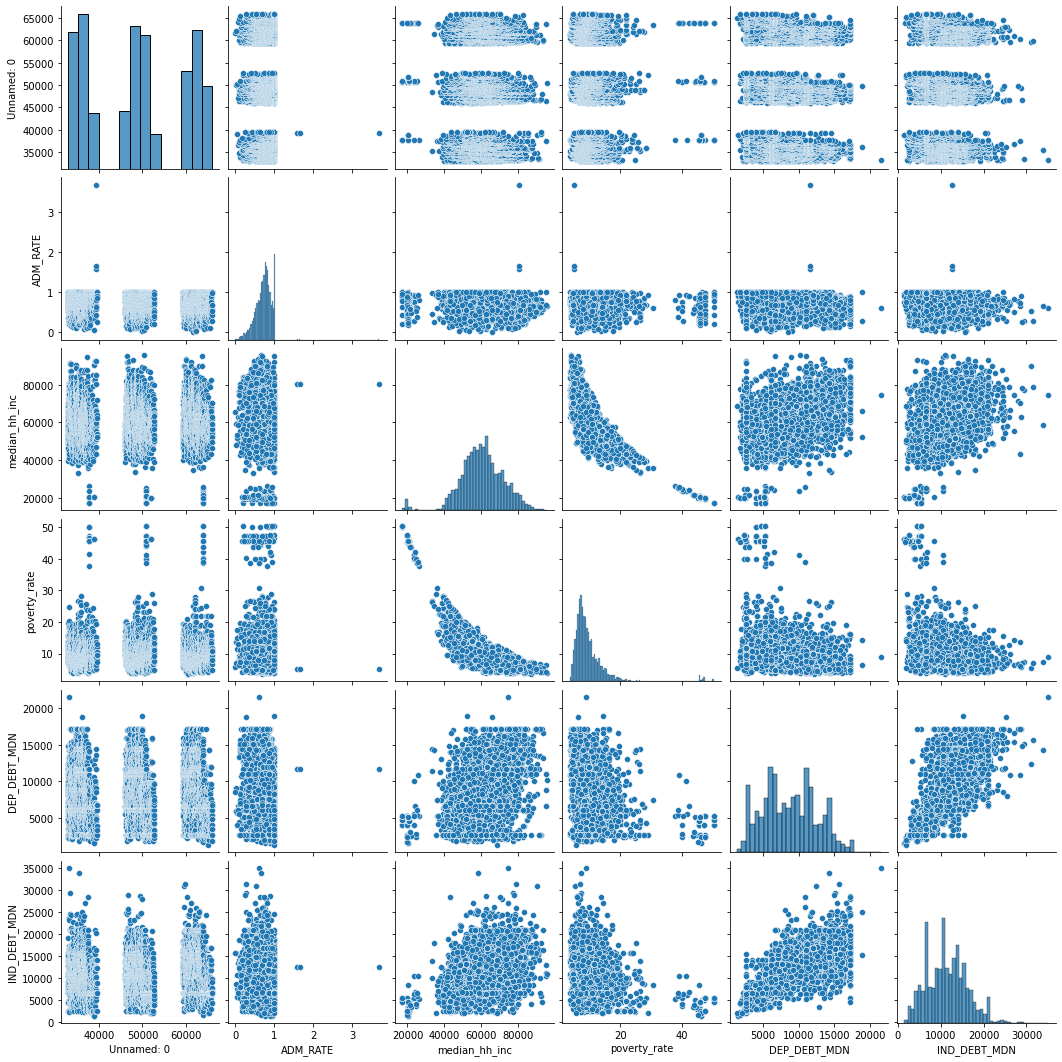

In [9]:
sns.pairplot(data=df)

In [124]:
df.columns

Index(['CITY', 'ADM_RATE', 'INSTNM', 'median_hh_inc', 'poverty_rate',
       'DEP_DEBT_MDN', 'IND_DEBT_MDN'],
      dtype='object')

In [125]:
#Remove outliers 
original_cols = df.columns

target_cols = ['ADM_RATE', 'median_hh_inc', 'poverty_rate',
       'DEP_DEBT_MDN', 'IND_DEBT_MDN']

z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore( df[col] )
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (106549, 12)
After removal of outliers (0, 12)


In [135]:
df.shape

(106549, 7)

In [41]:
df = df[original_cols]

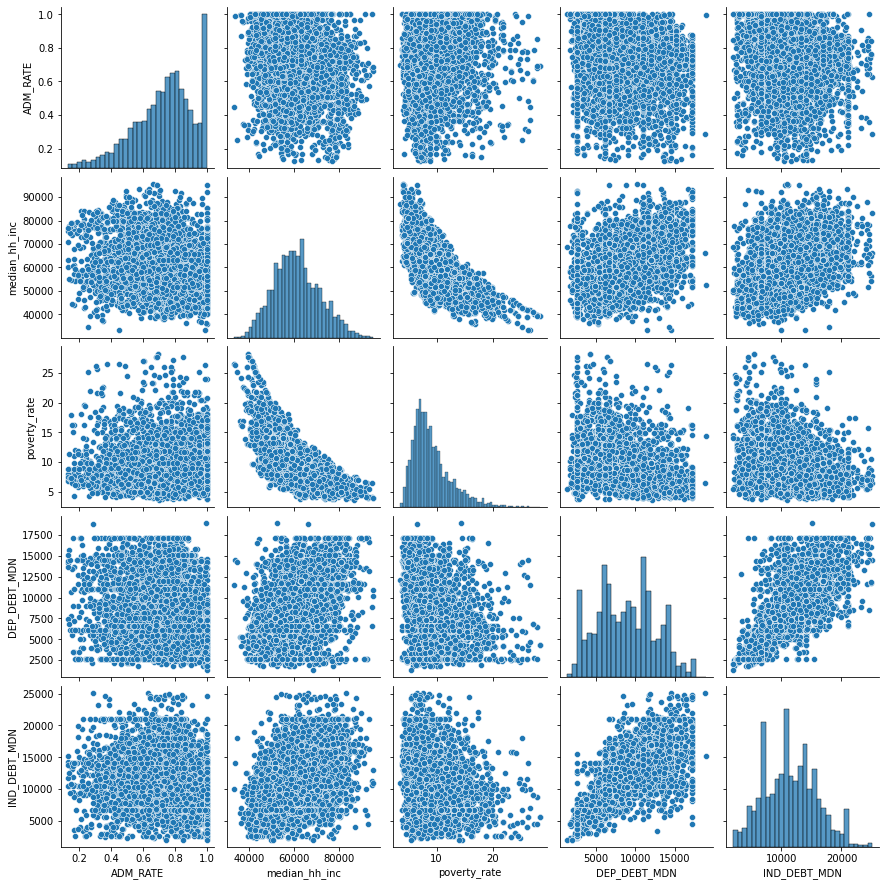

In [42]:
sns.pairplot(df)

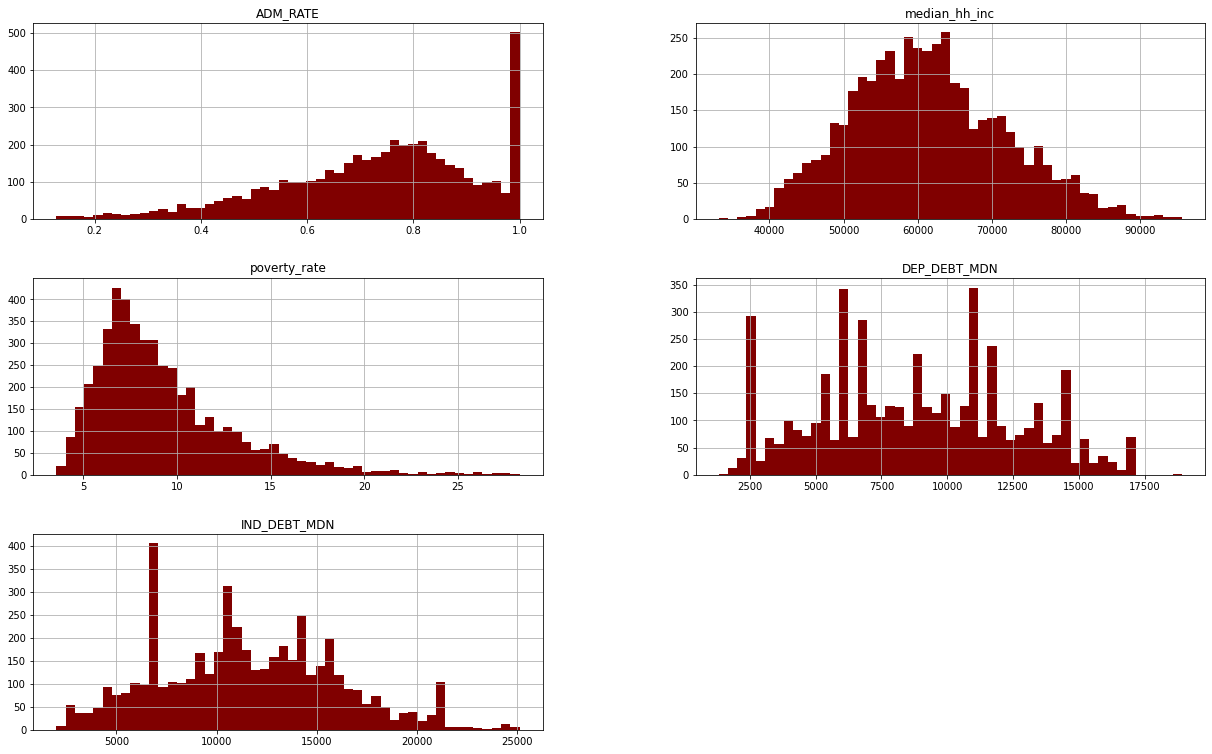

In [31]:
df.hist(bins=50, figsize=(21,13), color='maroon');

In [139]:
df_tmp = df.copy()

In [140]:
## Convert strings into categories
df_tmp.head()

,CITY,ADM_RATE,INSTNM,median_hh_inc,poverty_rate,DEP_DEBT_MDN,IND_DEBT_MDN
0,MONTGOMERY,NaN,COMMUNITY COLLEGE OF THE AIR FORCE,NaN,NaN,NaN,NaN
1,NORMAL,NaN,ALABAMA A & M UNIVERSITY,NaN,NaN,NaN,NaN
2,BIRMINGHAM,NaN,UNIVERSITY OF ALABAMA AT BIRMINGHAM,NaN,NaN,NaN,NaN
3,OZARK,NaN,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN,NaN,NaN,NaN
4,MONTGOMERY,NaN,SOUTHERN CHRISTIAN UNIVERSITY,NaN,NaN,NaN,NaN


In [141]:
#Find columns which contain strings 
for label, content in df_tmp.items(): 
  if pd.api.types.is_string_dtype(content): 
    print(label)

CITY
INSTNM


In [142]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106549 entries, 0 to 124698
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CITY           106549 non-null  object 
 1   ADM_RATE       33556 non-null   float64
 2   INSTNM         106549 non-null  object 
 3   median_hh_inc  31311 non-null   float64
 4   poverty_rate   31311 non-null   float64
 5   DEP_DEBT_MDN   67937 non-null   float64
 6   IND_DEBT_MDN   74861 non-null   float64
dtypes: float64(5), object(2)
memory usage: 6.5+ MB


In [143]:
# Convert strings to categories 
for label, content in df_tmp.items(): 
  if pd.api.types.is_string_dtype(content):
    print(label)
    df_tmp[label] = content.astype('category').cat.as_ordered()

CITY
INSTNM


In [145]:
#Turn Categorical variables into numbers 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
      # Add binary column to indicate whether sample had missing value
      df_tmp[label+"_is_missing"] = pd.isnull(content)
      # Turn categories into numbers and add +1
      df_tmp[label] = pd.Categorical(content).codes+1

In [146]:
  df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106549 entries, 0 to 124698
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CITY               106549 non-null  int16  
 1   ADM_RATE           33556 non-null   float64
 2   INSTNM             106549 non-null  int16  
 3   median_hh_inc      31311 non-null   float64
 4   poverty_rate       31311 non-null   float64
 5   DEP_DEBT_MDN       67937 non-null   float64
 6   IND_DEBT_MDN       74861 non-null   float64
 7   CITY_is_missing    106549 non-null  bool   
 8   INSTNM_is_missing  106549 non-null  bool   
dtypes: bool(2), float64(5), int16(2)
memory usage: 5.5 MB


In [148]:
df_tmp.CITY

0         2933
1         3289
2          328
3         3535
4         2933
          ... 
124694    1043
124695    5046
124696    5281
124697    3118
124698    4747
Name: CITY, Length: 106549, dtype: int16

FILL MISSING VALUES 

In [155]:
for label, content in df_tmp.items(): 
  if pd.api.types.is_numeric_dtype(content): 
    if pd.isnull(content).sum(): 
      #Fill null values witht he median and add bianry column which tells if data was missing
      df_tmp[label+'_is_missing']=pd.isnull(content)
      df_tmp[label]=content.fillna(content.median())

In [156]:
df_tmp.columns

Index(['CITY', 'ADM_RATE', 'INSTNM', 'median_hh_inc', 'poverty_rate',
       'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'CITY_is_missing', 'INSTNM_is_missing',
       'ADM_RATE_is_missing', 'median_hh_inc_is_missing',
       'poverty_rate_is_missing', 'DEP_DEBT_MDN_is_missing',
       'IND_DEBT_MDN_is_missing'],
      dtype='object')

In [167]:
X=df_tmp[['CITY', 'INSTNM']]
y=df_tmp['DEP_DEBT_MDN']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [169]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [170]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [171]:
model.score(X_test, y_test)

0.6514427279546506